In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn import base
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [113]:
Data=pd.read_csv("CRO.csv")

In [114]:
Data.shape

(316200, 6)

In [115]:
Data.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [116]:
#to check null columns and data type of columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [117]:
Data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [118]:
Data["country"].unique()

array(['UK', 'US', 'China', 'Germany'], dtype=object)

In [119]:
Data["source"].unique()

array(['Ads', 'Seo', 'Direct'], dtype=object)

In [120]:
Data["new_user"].unique()

array([1, 0], dtype=int64)

In [121]:
Data["converted"].unique()

array([0, 1], dtype=int64)

In [122]:
#new_user=1
#converted=1

In [123]:
Data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [124]:
Data.sort_values(by="age",ascending=False).head()

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1
265167,US,79,1,Direct,1,0
192644,US,77,0,Direct,4,0
154217,US,73,1,Seo,5,0


In [125]:
data=Data.loc[Data['age']<100].reset_index()

In [126]:
data.drop("index",axis=1,inplace=True)

In [127]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


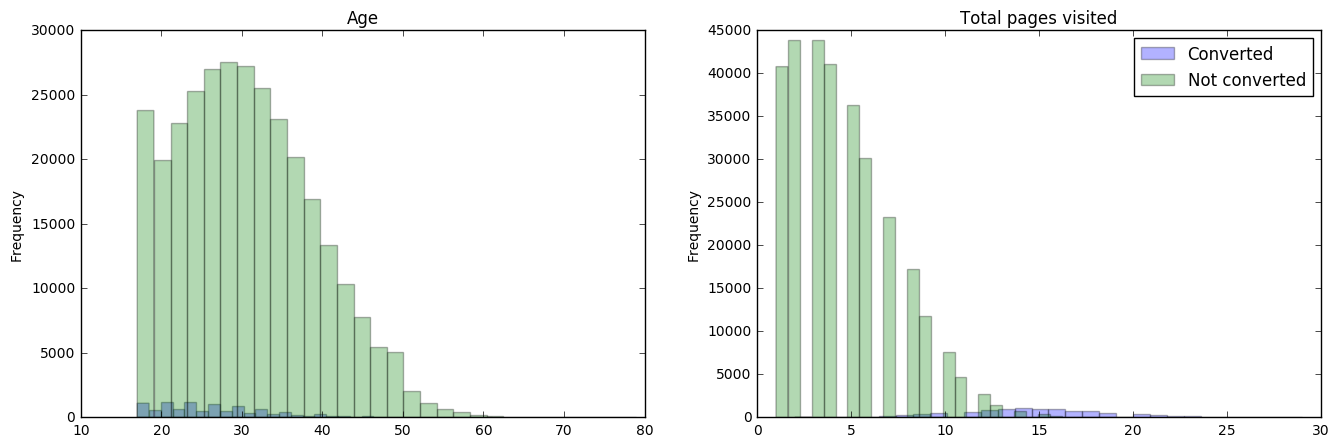

In [128]:
fig,axes=plt.subplots(1,2,figsize=(16, 5))
data.loc[data['converted']==1 ,'age'].plot.hist( bins= 30, ax=axes[0], alpha=.3, title= 'Age', label='Converted')
data.loc[data['converted']==0 ,'age'].plot.hist( bins= 30, ax=axes[0], alpha=.3, label='Not converted')

data.loc[data['converted']==1 ,'total_pages_visited'].plot.hist( bins= 30, ax=axes[1], alpha=.3, 
                                                                title= 'Total pages visited', label='Converted')
data.loc[data['converted']==0 ,'total_pages_visited'].plot.hist( bins= 30, ax=axes[1], alpha=.3,  label='Not converted')

plt.legend()

In [129]:
# compute correlation between age and total_pages_visted:
print(data.loc[data['converted']==1][['total_pages_visited','age']].corr())
print(data.loc[data['converted']==0][['total_pages_visited','age']].corr())

                     total_pages_visited       age
total_pages_visited             1.000000 -0.000465
age                            -0.000465  1.000000
                     total_pages_visited       age
total_pages_visited             1.000000  0.001367
age                             0.001367  1.000000


In [130]:
data.corr()

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


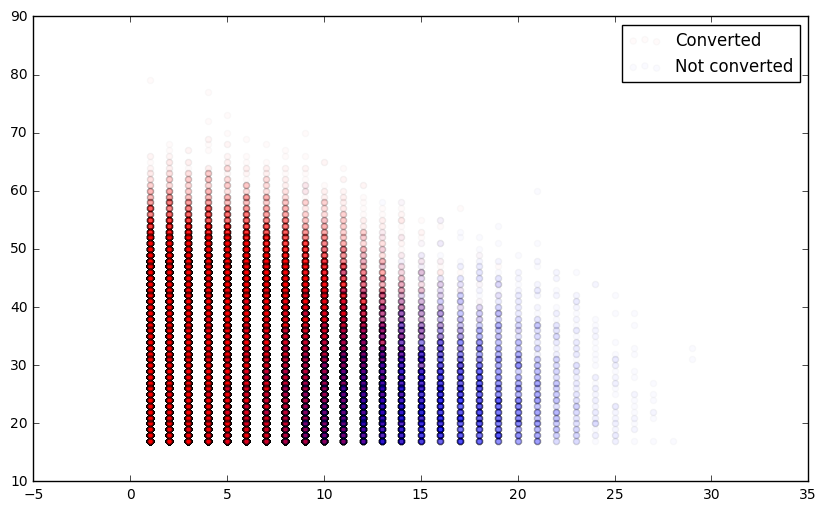

In [131]:
plt.figure(figsize= (10,6))
plt.scatter(data.loc[data['converted']==0, 'total_pages_visited'], data.loc[data['converted']==0, 'age'], 
            label = 'Converted', alpha=0.02,c='r')
plt.scatter(data.loc[data['converted']==1, 'total_pages_visited'], data.loc[data['converted']==1, 'age'], 
            label =  'Not converted', alpha=0.02)
plt.legend()

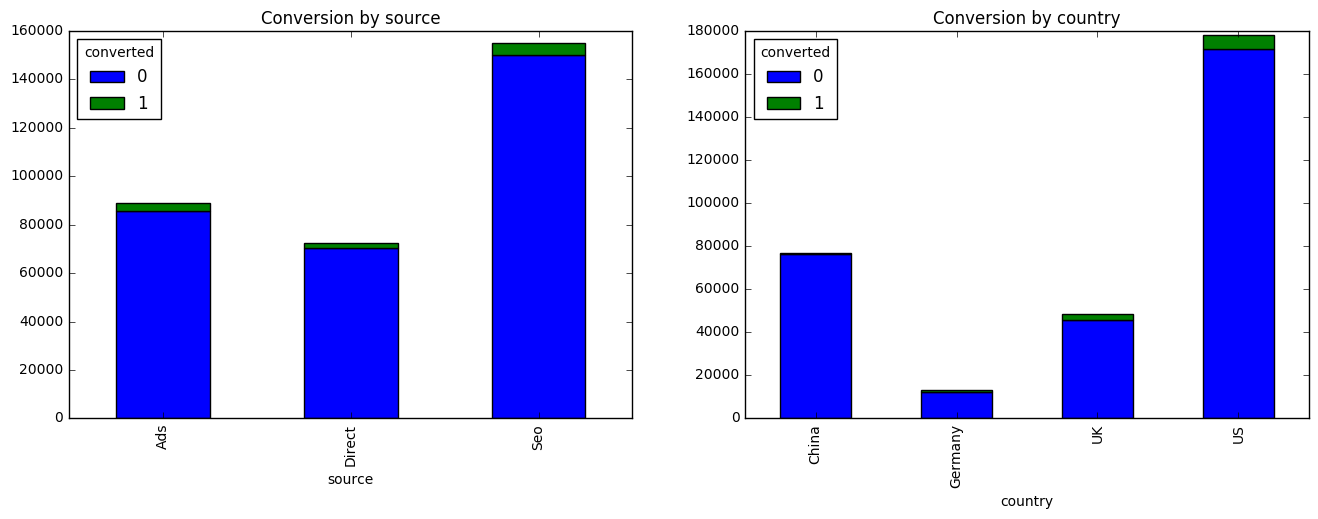

In [132]:
tmp1 = data.groupby(['country', 'converted']).size().unstack()
tmp2 = data.groupby(['source', 'converted']).size().unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
tmp2.plot.bar(stacked= True, ax=axes[0], title = 'Conversion by source')
tmp1.plot.bar(stacked= True, ax=axes[1], title = 'Conversion by country')

In [133]:
data.groupby(['country', 'converted']).size()

country  converted
China    0             76500
         1               102
Germany  0             12240
         1               815
UK       0             45900
         1              2549
US       0            171360
         1              6732
dtype: int64

In [134]:
 data.groupby(['source', 'converted']).size().unstack()

converted,0,1
source,,
Ads,85680,3059
Direct,70380,2040
Seo,149940,5099


In [135]:
data[['converted','source']].groupby(['source']).mean()

,converted
source,
Ads,0.034472
Direct,0.028169
Seo,0.032888


In [136]:
data[['converted','country']].groupby(['country']).mean()

,converted
country,
China,0.001332
Germany,0.062428
UK,0.052612
US,0.037801


In [137]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316198 entries, 0 to 316197
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [138]:
type(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316198 entries, 0 to 316197
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


NoneType

In [139]:
type(data)

pandas.core.frame.DataFrame

In [140]:
dt=pd.DataFrame(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316198 entries, 0 to 316197
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [141]:
type(dt)

pandas.core.frame.DataFrame

In [142]:
dt.shape

(0, 0)

In [143]:
type(list(data.columns))

list

In [144]:
# seperate the variables into numeric and categorical

categorical_variables=[]
numeric_variables=[]
for i in list(data.columns):
    if data[i].dtype == "object":
        categorical_variables.append(i)
    else:
        numeric_variables.append(i)
        

In [145]:
numeric_variables

['age', 'new_user', 'total_pages_visited', 'converted']

In [146]:
categorical_variables

['country', 'source']

In [197]:
data.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0.0,1.0,0.0,0.0,0.0
1,23,1,5,0,0.0,0.0,1.0,0.0,1.0
2,28,1,4,0,0.0,0.0,1.0,0.0,1.0
3,39,1,5,0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0,0.0,0.0,1.0,0.0,1.0


In [149]:
data=pd.get_dummies(data,drop_first=True)

In [150]:
data.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0.0,1.0,0.0,0.0,0.0
1,23,1,5,0,0.0,0.0,1.0,0.0,1.0
2,28,1,4,0,0.0,0.0,1.0,0.0,1.0
3,39,1,5,0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0,0.0,0.0,1.0,0.0,1.0


In [151]:
data.shape

(316198, 9)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc, f1_score,confusion_matrix, accuracy_score

Split data into training set and test set
Split data into traing set(75%) and test set(25%): 

In [156]:
X =  data.drop('converted', axis=1)
y = data['converted']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.25, random_state=42)

In [166]:
models={"LogisticReg":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "RandomForestClassifier":RandomForestClassifier(n_estimators=100),
        "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=100),
        "ExtraTreesClassifier":ExtraTreesClassifier(n_estimators=100),
        "GaussianN":GaussianNB()}

In [168]:
for key in models.keys():
    model=models[key]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)*100
    print(key, ":",acc)

GaussianN : 97.8747628083
RandomForestClassifier : 98.4996837445
DecisionTreeClassifier : 98.4655281467
GradientBoostingClassifier : 98.6476913346
LogisticReg : 98.6818469323
ExtraTreesClassifier : 98.5022137887


dict_keys(['GaussianN', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'LogisticReg', 'ExtraTreesClassifier'])

In [171]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm

In [175]:
regressor_OLS = sm.OLS(endog = y, exog = X).fit()

In [176]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                 1.866e+04
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        14:24:03   Log-Likelihood:             1.5542e+05
No. Observations:              316198   AIC:                        -3.108e+05
Df Residuals:                  316190   BIC:                        -3.107e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
age                    -0.0023   2.12e-05   -106.705      0.000        -0.002    -0.002
new_user               -0.0479      0.001    -88.819      0.000        -0.049    -0.047
total_pages_visited     0.0261   7.48e-05    349.239      0.000         0.026     0.026
country_Germany         0.0347      0.001     24.998      0.000         0.032     0.037
country_UK              0.0279      0.001     33.457      0.000         0.026     0.030
country_US              0.0174      0.001     28.823      0.000         0.016     0.019
source_Direct          -0.0111      0.001    -15.456      0.000        -0.012    -0.010
source_Seo             -0.0082      0.001    -13.750      0.000        -0.009    -0.007
==============================================================================
Omnibus:                   214553.374   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3106180.888
Skew:                           3.152   Prob(JB):                         0.00
Kurtosis:                      17.001   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:All columns are important

In [178]:
params = regressor_OLS.params

In [179]:
params

age                   -0.002262
new_user              -0.047938
total_pages_visited    0.026117
country_Germany        0.034664
country_UK             0.027908
country_US             0.017421
source_Direct         -0.011085
source_Seo            -0.008179
dtype: float64

In [182]:
conf = regressor_OLS.conf_int()

In [183]:
conf

,0,1
age,-0.002303,-0.002220
new_user,-0.048996,-0.046880
total_pages_visited,0.025970,0.026263
country_Germany,0.031946,0.037381
country_UK,0.026273,0.029543
country_US,0.016236,0.018606
source_Direct,-0.012491,-0.009680
source_Seo,-0.009344,-0.007013


In [184]:
conf['OR'] = params

In [185]:
conf

,0,1,OR
age,-0.002303,-0.002220,-0.002262
new_user,-0.048996,-0.046880,-0.047938
total_pages_visited,0.025970,0.026263,0.026117
country_Germany,0.031946,0.037381,0.034664
country_UK,0.026273,0.029543,0.027908
country_US,0.016236,0.018606,0.017421
source_Direct,-0.012491,-0.009680,-0.011085
source_Seo,-0.009344,-0.007013,-0.008179


In [186]:
conf.columns = ['2.5%', '97.5%', 'OR']

In [187]:
conf

,2.5%,97.5%,OR
age,-0.002303,-0.002220,-0.002262
new_user,-0.048996,-0.046880,-0.047938
total_pages_visited,0.025970,0.026263,0.026117
country_Germany,0.031946,0.037381,0.034664
country_UK,0.026273,0.029543,0.027908
country_US,0.016236,0.018606,0.017421
source_Direct,-0.012491,-0.009680,-0.011085
source_Seo,-0.009344,-0.007013,-0.008179


In [188]:
print (np.exp(conf))

                         2.5%     97.5%        OR
age                  0.997699  0.997782  0.997741
new_user             0.952185  0.954201  0.953193
total_pages_visited  1.026311  1.026611  1.026461
country_Germany      1.032462  1.038089  1.035271
country_UK           1.026621  1.029984  1.028301
country_US           1.016369  1.018780  1.017574
source_Direct        0.987587  0.990367  0.988976
source_Seo           0.990699  0.993012  0.991855


In [194]:
traincorr=data.corr()

In [195]:
traincorr

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
age,1.000000,0.012445,-0.046093,-0.089199,-0.003173,-0.006144,-0.000388,-0.000088,0.002482
new_user,0.012445,1.000000,-0.082522,-0.152338,-0.003656,-0.005149,-0.008522,0.001626,-0.001655
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975,0.019693,0.026629,0.019456,-0.009138,0.003218
converted,-0.089199,-0.152338,0.528975,1.000000,0.035446,0.049023,0.035666,-0.012596,0.003534
country_Germany,-0.003173,-0.003656,0.019693,0.035446,1.000000,-0.088276,-0.235657,-0.004768,0.000949
country_UK,-0.006144,-0.005149,0.026629,0.049023,-0.088276,1.000000,-0.483053,0.000722,0.000797
country_US,-0.000388,-0.008522,0.019456,0.035666,-0.235657,-0.483053,1.000000,0.002624,-0.001193
source_Direct,-0.000088,0.001626,-0.009138,-0.012596,-0.004768,0.000722,0.002624,1.000000,-0.534595
source_Seo,0.002482,-0.001655,0.003218,0.003534,0.000949,0.000797,-0.001193,-0.534595,1.000000


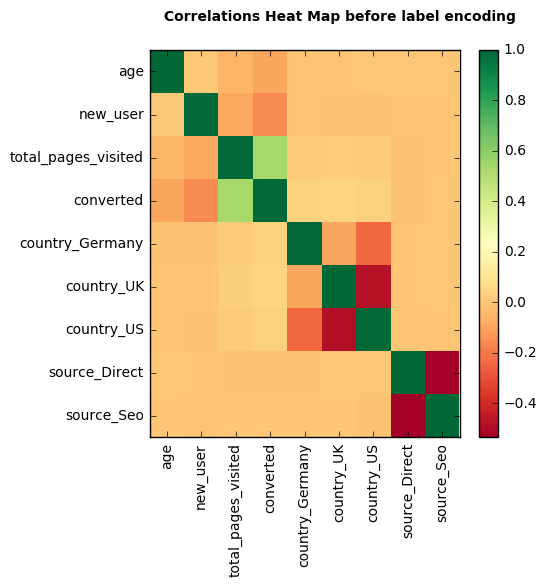

In [196]:
plt.figure(figsize=(5, 5))
plt.imshow(traincorr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(traincorr)), traincorr.columns, rotation='vertical')
plt.yticks(range(len(traincorr)), traincorr.columns);
plt.suptitle(' Correlations Heat Map before label encoding', fontsize=10, fontweight='bold')
plt.show()

In [198]:
data.shape

(316198, 9)

In [199]:
np.abs(traincorr['converted']).sort_values(ascending=False)

converted              1.000000
total_pages_visited    0.528975
new_user               0.152338
age                    0.089199
country_UK             0.049023
country_US             0.035666
country_Germany        0.035446
source_Direct          0.012596
source_Seo             0.003534
Name: converted, dtype: float64